## Import Libaries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report,accuracy_score

## Import Dataset

In [2]:
bank_data = pd.read_csv('Churn_Modelling.csv')

In [3]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
bank_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
bank_data.shape

(10000, 14)

## Handling Missing Data

In [7]:
bank_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Encoding Categorial Data

In [8]:
bank_data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [9]:
bank_data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
label = LabelEncoder()
bank_data['Geography'] = label.fit_transform(bank_data['Geography'])
bank_data['Gender'] = label.fit_transform(bank_data['Gender'])

In [11]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int32  
 5   Gender           10000 non-null  int32  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int32(2), int64(9), object(1)
memory usage: 1015.8+ KB


In [12]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


## Data Visualisation

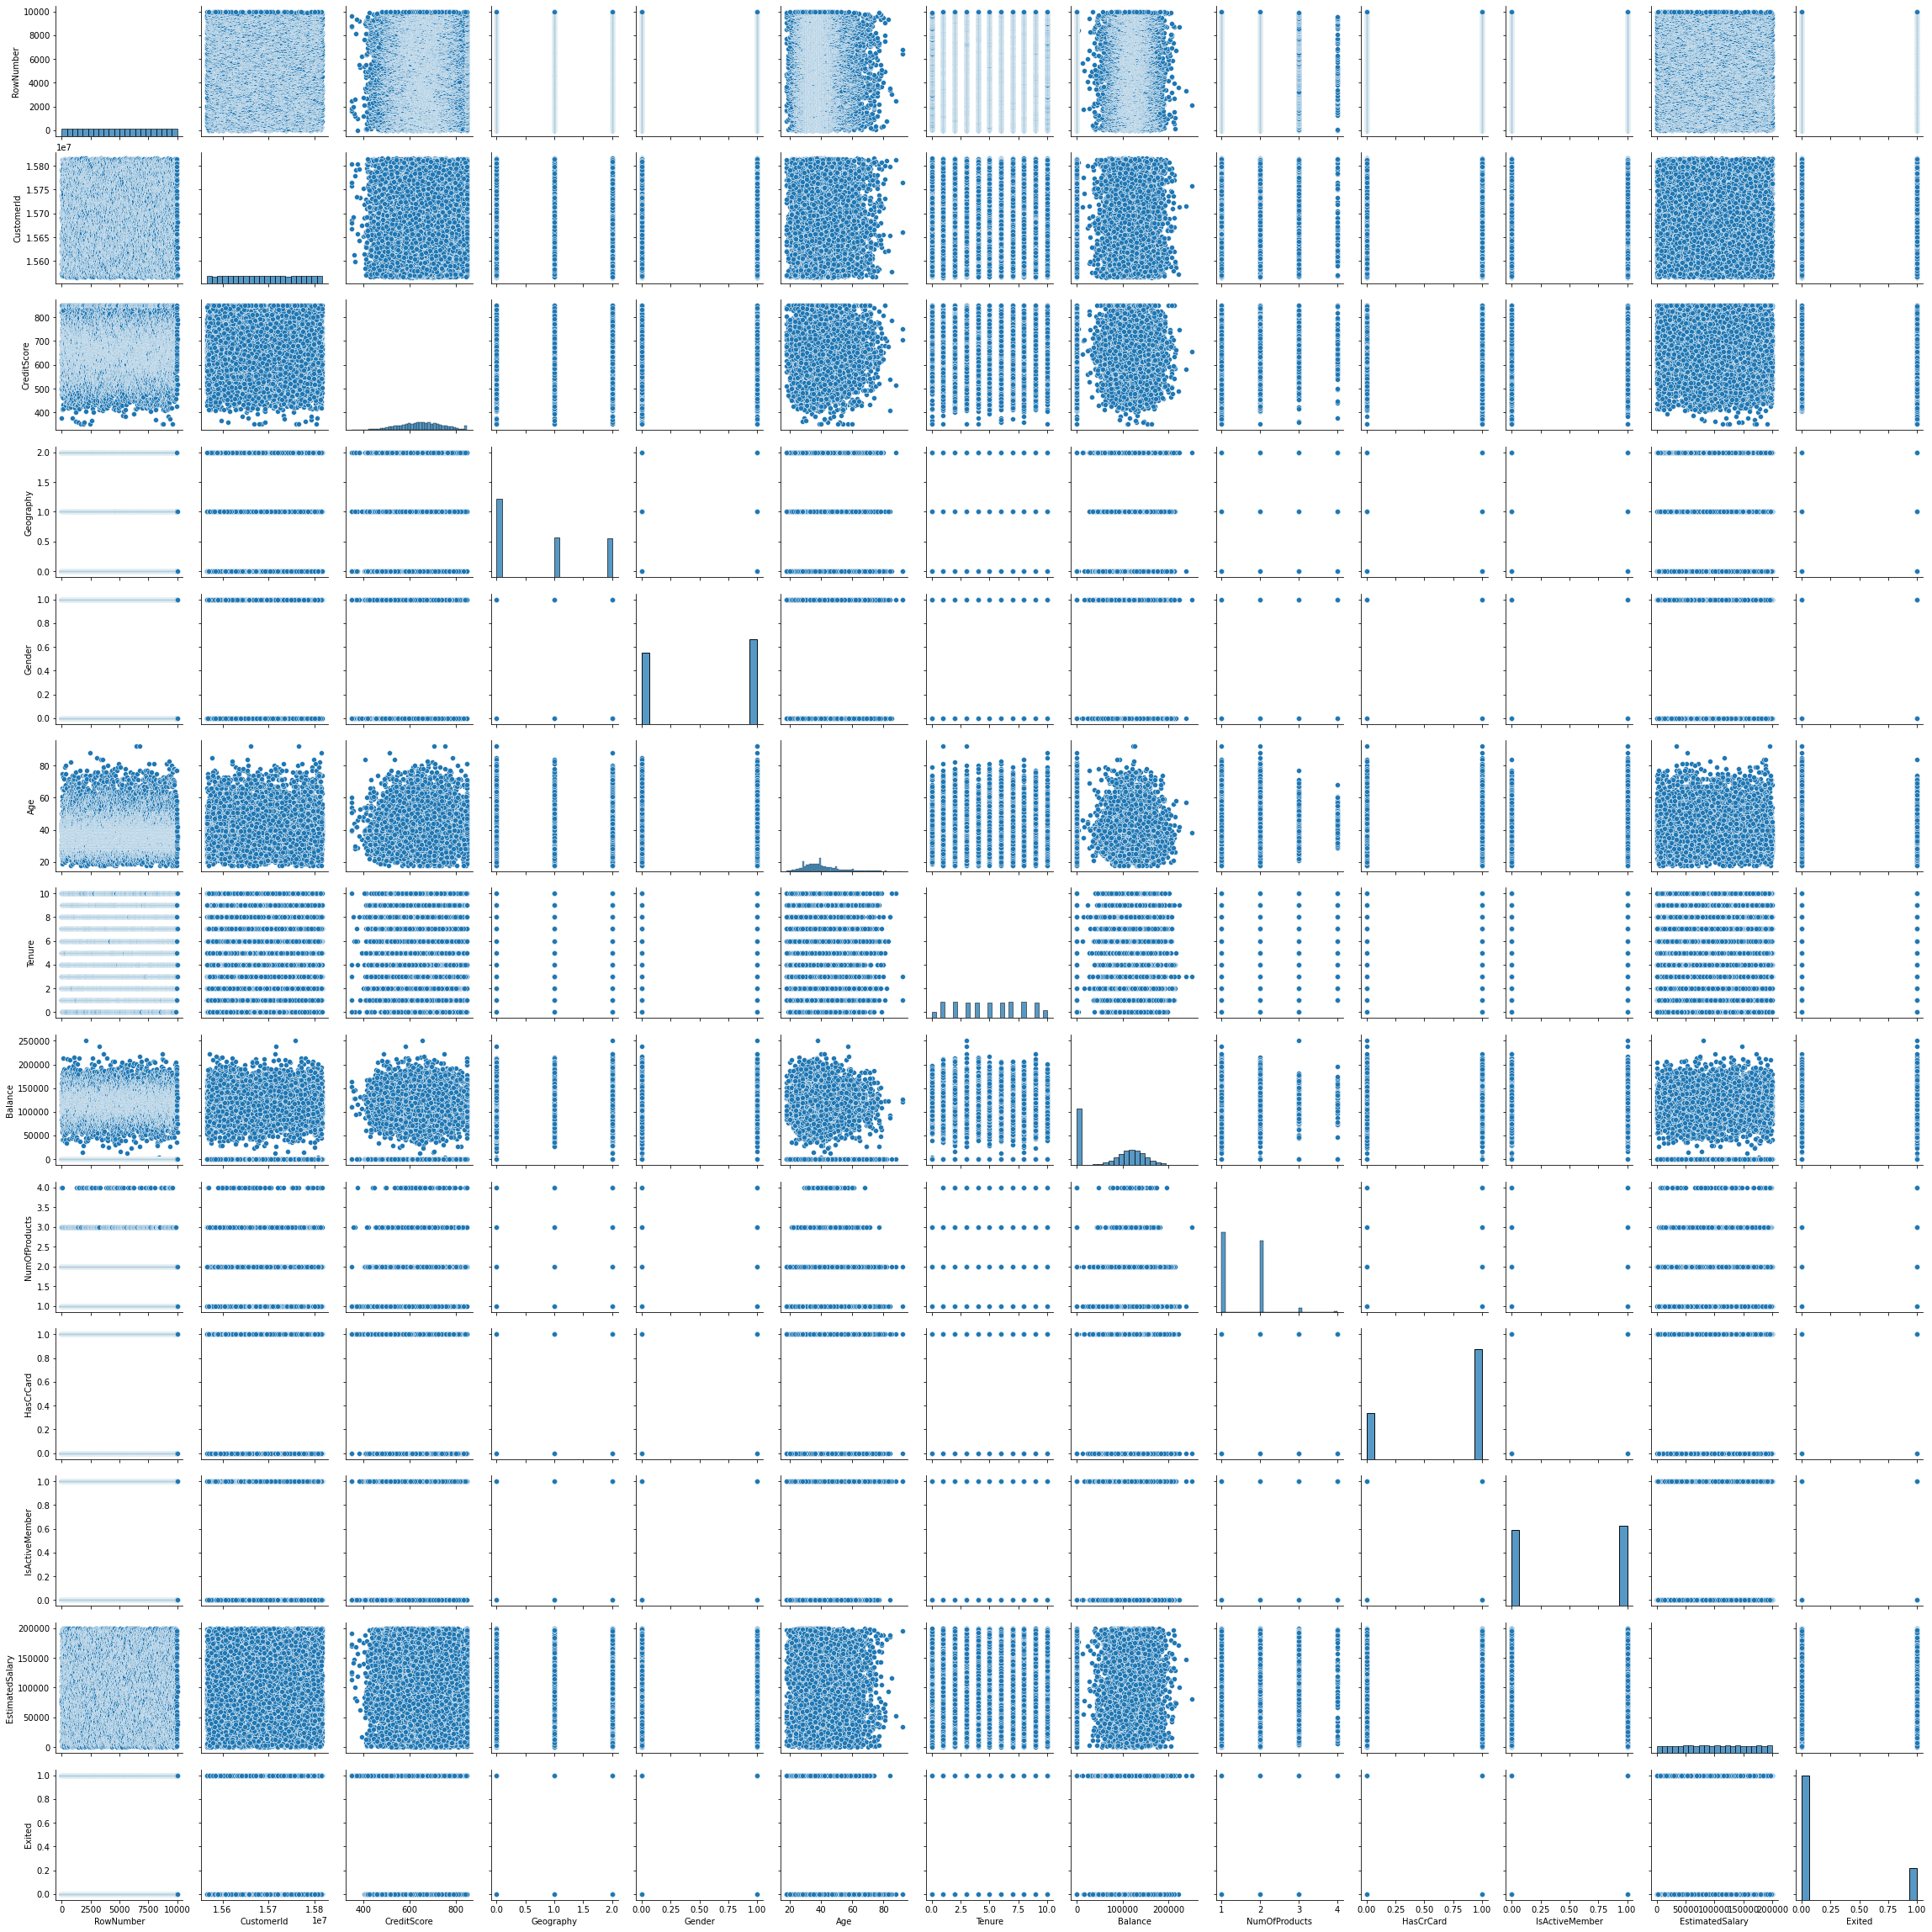

In [13]:
sns.pairplot(data=bank_data)

<AxesSubplot:>

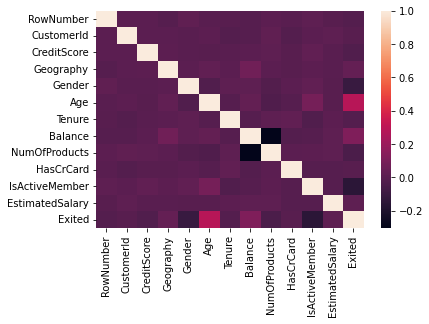

In [14]:
sns.heatmap(data=bank_data.corr())

## Model Selection

In [15]:
bank_data = bank_data.drop(['RowNumber','Surname'],axis=1)

In [16]:
bank_data.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [17]:
x = bank_data.drop(['Exited'],axis=1)

In [18]:
y = bank_data['Exited']

## Split Train and Test

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=0)

In [20]:
len(x_train)

2000

In [21]:
len(x_test)

8000

## Building ANN

In [22]:
model = keras.Sequential([
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

## Compile ANN

In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [24]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
63/63 [==============================] - 1s 2ms/step - loss: 80926.3516 - accuracy: 0.7060
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 4436.6987 - accuracy: 0.6900
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 3133.8750 - accuracy: 0.6975
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 3186.7749 - accuracy: 0.6985
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 2422.6143 - accuracy: 0.6870
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 4558.9561 - accuracy: 0.6965
Epoch 7/100
63/63 [==============================] - 0s 2ms/step - loss: 2515.7534 - accuracy: 0.6805
Epoch 8/100
63/63 [==============================] - 0s 2ms/step - loss: 4960.9683 - accuracy: 0.6890
Epoch 9/100
63/63 [==============================] - 0s 2ms/step - loss: 4768.9663 - accuracy: 0.6820
Epoch 10/100
63/63 [==============================] - 0s 2ms/step - loss: 7378.95

63/63 [==============================] - 0s 2ms/step - loss: 5073.6182 - accuracy: 0.6945
Epoch 81/100
63/63 [==============================] - 0s 1ms/step - loss: 3181.4211 - accuracy: 0.6795
Epoch 82/100
63/63 [==============================] - 0s 2ms/step - loss: 3740.3193 - accuracy: 0.6850
Epoch 83/100
63/63 [==============================] - 0s 2ms/step - loss: 2686.7341 - accuracy: 0.6770
Epoch 84/100
63/63 [==============================] - 0s 2ms/step - loss: 7271.7700 - accuracy: 0.6690
Epoch 85/100
63/63 [==============================] - 0s 2ms/step - loss: 5672.0527 - accuracy: 0.6725
Epoch 86/100
63/63 [==============================] - 0s 2ms/step - loss: 5672.0327 - accuracy: 0.6910
Epoch 87/100
63/63 [==============================] - 0s 2ms/step - loss: 4485.3794 - accuracy: 0.6865
Epoch 88/100
63/63 [==============================] - 0s 2ms/step - loss: 5558.2480 - accuracy: 0.6755
Epoch 89/100
63/63 [==============================] - 0s 2ms/step - loss: 2114.5596 - 

In [25]:
model.evaluate(x_test,y_test)

250/250 [==============================] - 1s 1ms/step - loss: 6139.1865 - accuracy: 0.7955


[6139.1865234375, 0.7954999804496765]

## Prediction

In [26]:
y_preds = model.predict(x_test)
y_preds

250/250 [==============================] - 0s 1ms/step


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [27]:
y_pred = []
for element in y_preds:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [28]:
y_pred[:15]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

## Classification Report

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      6364
           1       0.00      0.00      0.00      1636

    accuracy                           0.80      8000
   macro avg       0.40      0.50      0.44      8000
weighted avg       0.63      0.80      0.70      8000



## Accuarcy Score

In [30]:
score = accuracy_score(y_test,y_pred) * 100
score

79.55